# Credit Card Fraud Detection 💳
As we are moving towards the digital world — cybersecurity is becoming a crucial part of our life. When we talk about security in digital life then the main challenge is to find the abnormal activity.<br>
In this task we are going to classify abnormal transactions using three different ML models: LogisticRegression, RandomForestClassifier, and DecisionTreeClassifier. For this I have used Kaggle's [Credit Fraud](https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/data?select=creditcard.csv) dataset.

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

### Reading dataset

In [ ]:
df = pd.read_csv('creditcard.csv')
df.shape

(284807, 31)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


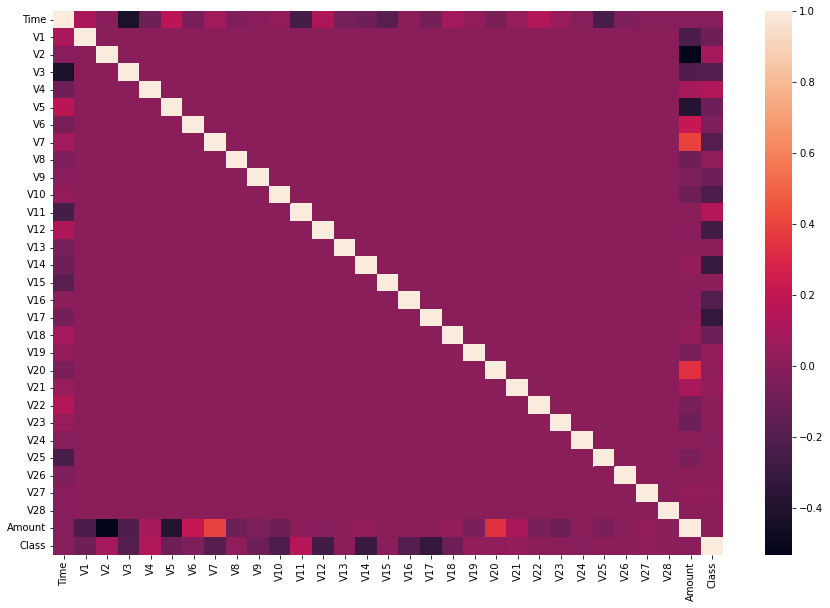

In [ ]:
#understanding the relationship between variables
correlation = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


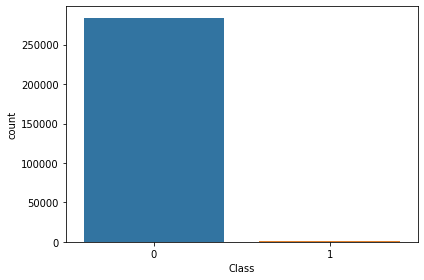

In [ ]:
sns.countplot(df['Class'])    #number of values for each class
plt.tight_layout()

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Balancing the dataset

In [ ]:
normal_transaction = df[df.Class == 0]
fraud_transaction = df[df.Class == 1]

In [ ]:
print("Shape of normal transaction: ", normal_transaction.shape)
print("Shape of fraud transaction: ", fraud_transaction.shape)

Shape of normal transaction:  (284315, 31)
Shape of fraud transaction:  (492, 31)


In [ ]:
normal_transaction.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud_transaction.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
normal_df = normal_transaction.sample(n=492)
normal_df.shape

(492, 31)

In [ ]:
credit_card_df = pd.concat([normal_df, fraud_transaction], axis=0)
credit_card_df.shape

(984, 31)

In [ ]:
credit_card_df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [ ]:
X = credit_card_df.drop('Class', axis=1)
X.shape

(984, 30)

In [ ]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
1409,1092.0,-0.627985,1.008926,0.344097,-0.294813,2.265222,0.425443,0.979726,-0.017779,-0.772064,-1.041404,0.480523,0.185040,0.860524,-1.722993,0.053895,1.026675,-0.106142,1.171874,-0.585800,0.115207,-0.030707,0.045894,-0.527148,-1.831953,0.401045,-0.403386,-0.046805,-0.097188,1.00
229117,145803.0,0.030440,0.366062,-0.140900,-0.449353,0.806514,0.476198,1.423401,-0.499942,1.007629,-0.786177,-1.873217,-0.613826,-0.356261,-2.143193,-1.542284,-0.209209,0.413077,0.512073,0.180256,0.005873,0.144169,1.140604,-0.317504,0.049423,-0.603553,0.619802,-0.188165,-0.224819,120.50
215860,140247.0,-0.720463,1.010824,0.269906,0.531899,2.042835,-0.192562,1.219461,-0.079854,-1.637176,-0.114867,0.533058,0.197730,-0.086859,0.948572,0.007068,-0.607441,-0.396331,0.468512,1.165207,0.159864,0.182224,0.389158,-0.596284,0.238363,1.173154,-0.200699,0.009068,0.047807,1.00
284288,172304.0,-0.771317,1.247051,-0.926952,0.480548,1.788204,1.580280,0.639209,0.800932,-0.923497,-0.061799,0.351029,0.482684,-0.598620,1.068154,-0.185344,-1.466674,0.620184,-0.780735,0.329604,-0.142328,0.234553,0.870215,-0.136087,-0.941503,-0.074449,-0.302091,0.231217,0.144399,14.99
136793,81870.0,0.520825,-1.879553,-0.282574,-0.161326,-1.411747,-0.719947,0.217149,-0.249617,-1.055603,0.605681,1.073685,0.505650,-0.335090,0.413839,-0.657296,-1.583950,0.176146,1.164650,-0.384745,0.347057,-0.129752,-0.797538,-0.364506,0.592375,0.203844,1.017832,-0.156043,0.063420,434.96


In [ ]:
Y = credit_card_df['Class']
Y.shape

(984,)

In [ ]:
Y

1409      0
229117    0
215860    0
284288    0
136793    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

### Train and test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print("Shape of x_train data: ", x_train.shape)
print("Shape of x_test data: ", x_test.shape)

Shape of x_train data:  (787, 30)
Shape of x_test data:  (197, 30)


In [ ]:
y_train.value_counts()

1    398
0    389
Name: Class, dtype: int64

## Modelling

### Method 1: Logistic Regression

In [ ]:
lr_model = LogisticRegression()

In [ ]:
lr_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_y_pred = lr_model.predict(x_test)

In [ ]:
x_predict = list(lr_y_pred)
lr_predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
pd.DataFrame(lr_predicted_df)

,predicted_values,original_values
193830,0,0
120837,1,1
200411,0,0
77682,1,1
236379,0,0
...,...,...
144104,1,1
138411,0,0
179121,0,0
190261,0,0


In [ ]:
#accuracy score
lr_accuracy = accuracy_score(lr_y_pred, y_test)
print("Accuracy: ", lr_accuracy)

Accuracy:  0.949238578680203


In [ ]:
#precision calculates the value that says out of all total predicted positive sentiment how many were actually positive
#recall calculates the value that says out of all actual positives how many were predicted correctly positive.
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       103
           1       0.95      0.95      0.95        94

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



[[98  5]
 [ 5 89]]


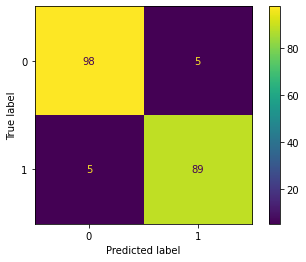

In [ ]:
#performance measurement for classification problem 
cm = confusion_matrix(y_test, lr_y_pred, lr_model.classes_)
print(cm)
matrix = ConfusionMatrixDisplay(cm, lr_model.classes_)
matrix.plot()

### Method 2: Random Forest

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_y_pred = rf_model.predict(x_test)

In [ ]:
x_predict = list(rf_y_pred)
rf_predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
pd.DataFrame(rf_predicted_df)

,predicted_values,original_values
193830,0,0
120837,1,1
200411,0,0
77682,1,1
236379,0,0
...,...,...
144104,1,1
138411,0,0
179121,0,0
190261,0,0


In [ ]:
#accuracy score
rf_accuracy = accuracy_score(rf_y_pred, y_test)
print("Accuracy: ", rf_accuracy)

Accuracy:  0.934010152284264


In [ ]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       103
           1       0.94      0.93      0.93        94

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



[[97  6]
 [ 7 87]]


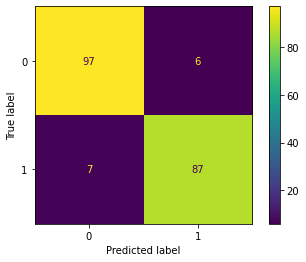

In [ ]:
cm = confusion_matrix(y_test, rf_y_pred, rf_model.classes_)
print(cm)
matrix = ConfusionMatrixDisplay(cm, rf_model.classes_)
matrix.plot()

### Method 3: Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_y_pred = dt_model.predict(x_test)

In [ ]:
x_predict = list(dt_y_pred)
dt_predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
pd.DataFrame(dt_predicted_df)

,predicted_values,original_values
193830,0,0
120837,1,1
200411,0,0
77682,1,1
236379,0,0
...,...,...
144104,1,1
138411,0,0
179121,0,0
190261,0,0


In [ ]:
dt_accuracy = accuracy_score(dt_y_pred, y_test)
print("Accuracy: ", dt_accuracy)

Accuracy:  0.9187817258883249


In [ ]:
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       103
           1       0.91      0.93      0.92        94

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



[[94  9]
 [ 7 87]]


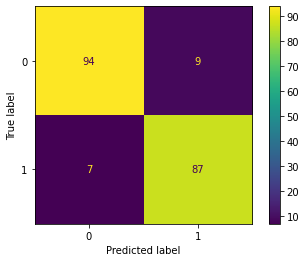

In [ ]:
cm = confusion_matrix(y_test, dt_y_pred, dt_model.classes_)
print(cm)
matrix = ConfusionMatrixDisplay(cm, dt_model.classes_)
matrix.plot()

# Summary:
In this task, I have used three different ML models to classify abnormal transactions.<br>
The accuracy score using:
* Logistic Regression is: 0.949
* Random Forest is: 0.934
* Decision Tree is: 0.918

#### References:
* https://towardsdatascience.com/credit-card-fraud-detection-using-machine-learning-python-5b098d4a8edc
* https://www.geeksforgeeks.org/ml-credit-card-fraud-detection/